In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('spam.csv', encoding='latin1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df.shape

(5572, 5)

## Steps Involved
1. Data Cleaning
2. EDA
3. Text Preprocessing
4. Model Building
5. Evaluation
6. Improvements
7. Website
8. Deployment

In [4]:
df.dtypes

v1            object
v2            object
Unnamed: 2    object
Unnamed: 3    object
Unnamed: 4    object
dtype: object

1. Data Cleaning


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
# drop last 3 columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [7]:
df.sample(5)

,v1,v2
2964,ham,Not yet had..ya sapna aunty manege y'day hogid...
1283,ham,Yes i thought so. Thanks.
3586,ham,Our ride equally uneventful - not too many of ...
3013,ham,I might go 2 sch. Yar at e salon now v boring.
3181,ham,"My Parents, My Kidz, My Friends n My Colleague..."


In [8]:
# Renaming Columns
df.rename(columns={'v1':'target','v2':'text'}, inplace=True)
df

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [9]:
# encoding target variable in 0 and 1
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])
df.sample(5)

,target,text
4227,0,Have you started in skye
1122,0,Ok.ok ok..then..whats ur todays plan
837,0,"Sir, I have been late in paying rent for the p..."
1692,0,Weightloss! No more girl friends. Make loads o...
3800,0,"It's ok, at least armand's still around"


In [10]:
# Checking Missing Values
df.isnull().sum()

target    0
text      0
dtype: int64

In [11]:
# Check for duplicate values:
df.duplicated().sum()

np.int64(403)

In [12]:
# Dropping Duplicates
df = df.drop_duplicates(keep='first')
df.duplicated().sum()

np.int64(0)

In [13]:
df.shape

(5169, 2)

2. Exploratory Data Analysis: Getting to know your data.

In [14]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

Here we can see there is data imbalance

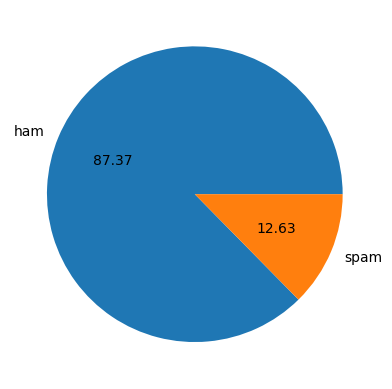

In [15]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels =['ham','spam'],autopct="%0.2f")
plt.show()

1st conclusion: Class Imbalance

2nd analysis: How Many alphabets/words/sentence are being used in data.

for this purpose first you have to install nltk, if haven't installed previously. You can install it using below command:
- !pip install nltk

pip cache purge



To work NLP properly we have to download some dependencies and this can b e done using below command: 
- nltk.download('punkt)

1. nltk.download('punkt') downloads the Punkt tokenizer models for the Natural Language Toolkit (NLTK). This is necessary because NLTK's word_tokenize and sent_tokenize functions rely on these models to accurately split text into words and sentences, respectively, especially when dealing with varying punctuation and abbreviations. 

2. Here's a more detailed explanation: 
        1. Tokenization:
Tokenization is the process of breaking down a text into smaller units, like words or sentences. NLTK provides various tokenizers, and the punkt tokenizer is a popular choice for handling complex sentence boundary detection.

        2. Punkt's Role:
The Punkt tokenizer learns to identify sentence boundaries from a training corpus, which includes information about common abbreviations and punctuation rules.

        3. Why Download?
When you first install NLTK, it doesn't automatically include all the necessary data files, such as the Punkt models. The nltk.download('punkt') command downloads these files from the NLTK data repository and makes them available for use.

        4. Using the Tokenizers:
After downloading, you can import and use sent_tokenize and word_tokenize from nltk.tokenize. These functions will then utilize the downloaded Punkt models to process text.




In [16]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [17]:
import nltk
# # Number of characters used:
df['num_characters'] = df['text'].apply(len)
# # number of words:
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))
# # number of sentence:
df['num_sentence'] = df['text'].apply(lambda x : len(nltk.sent_tokenize(x)))
df.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_6580\3530704036.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters'] = df['text'].apply(len)
C:\Users\Admin\AppData\Local\Temp\ipykernel_6580\3530704036.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))
C:\Users\Admin\AppData\Local\Temp\ipykernel_6580\3530704036.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

,target,text,num_characters,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [18]:
# statistics on these columns
df[['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [19]:
# statistics on these columns when target == 0
df[df['target'] == 0][['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [20]:
# statistics on these columns when target == 1
df[df['target'] == 1][['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

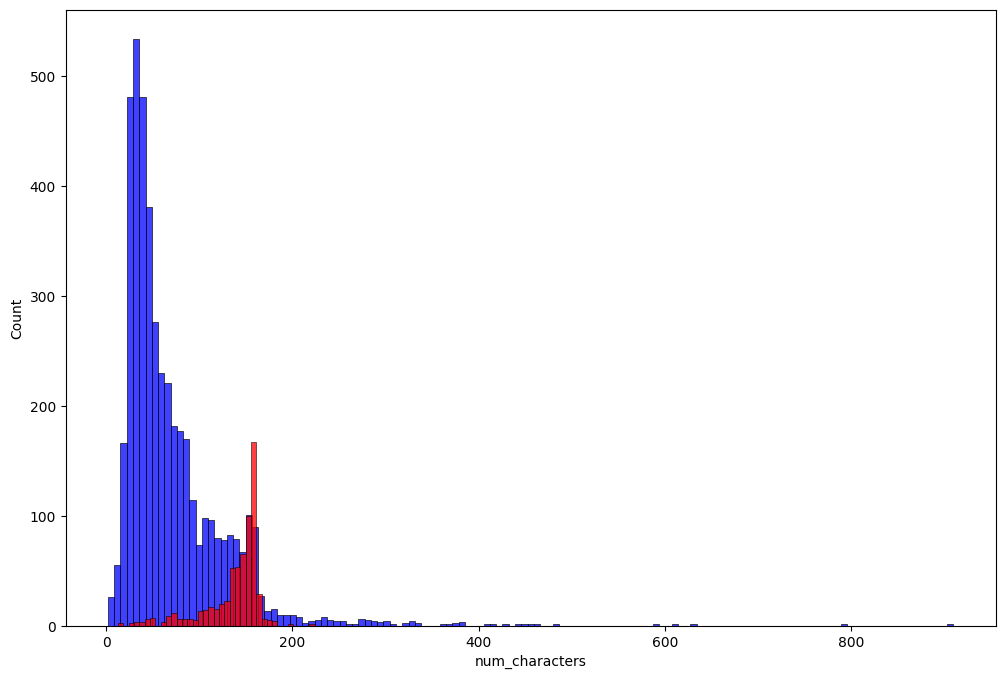

In [21]:
# plotting these in histogram
import seaborn as sns
plt.figure(figsize=(12,8))
sns.histplot(df[df['target'] == 0]['num_characters'],color = 'blue')
sns.histplot(df[df['target'] == 1]['num_characters'],color = 'red')

2nd Conclusion: So we can see mostly ham messages are formed from less characters and mostly spam messages are formed using more characters.


<Axes: xlabel='num_words', ylabel='Count'>

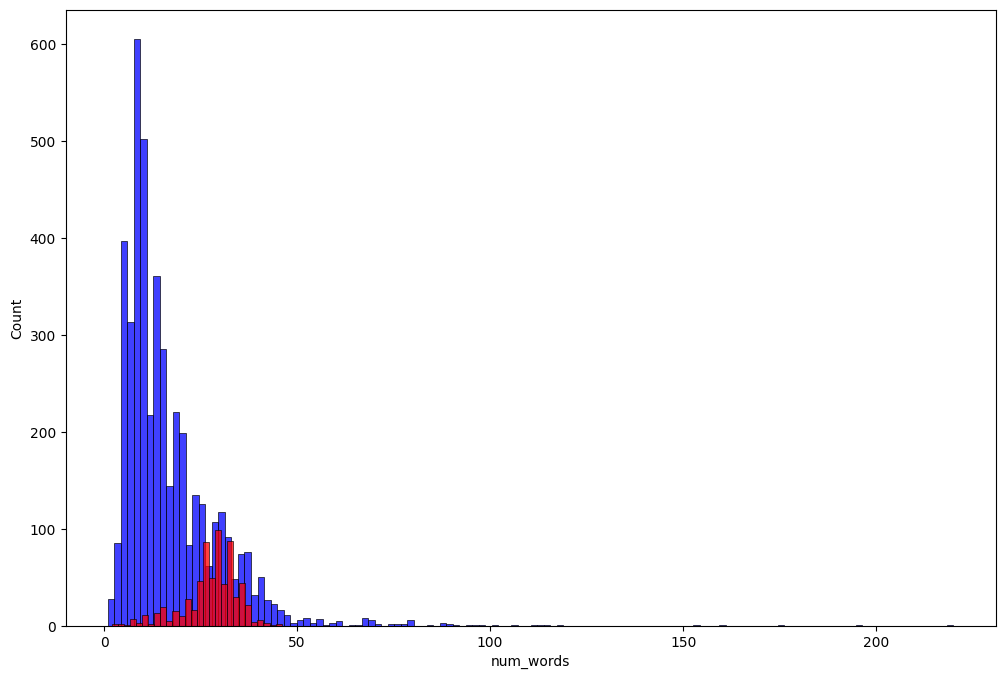

In [22]:
# plotting these in histogram
import seaborn as sns
plt.figure(figsize=(12,8))
sns.histplot(df[df['target'] == 0]['num_words'],color = 'blue')
sns.histplot(df[df['target'] == 1]['num_words'],color = 'red')

2nd Conclusion: So we can see mostly ham messages are formed from less words and mostly spam messages are formed using more words.

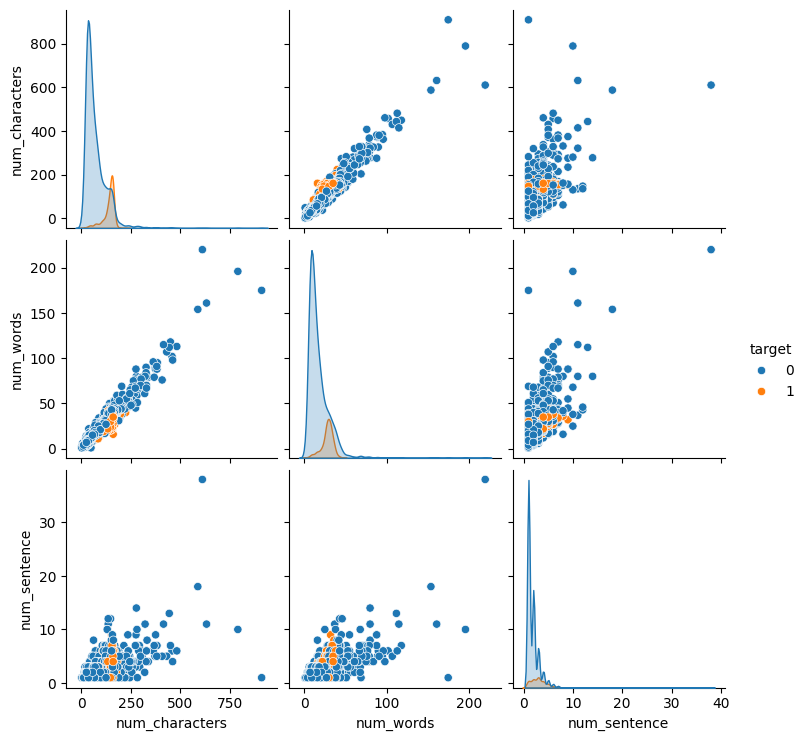

In [23]:
sns.pairplot(df,hue='target')

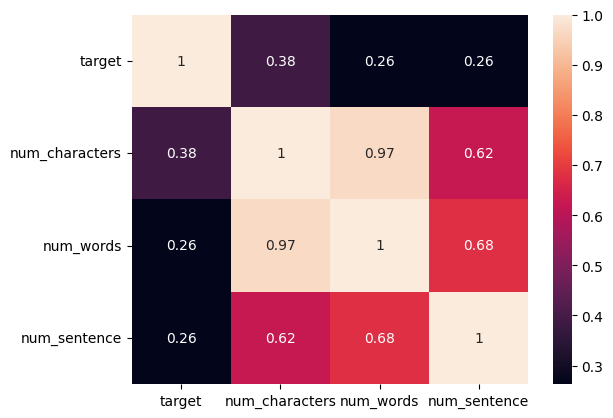

In [24]:
numeric_df = df.select_dtypes(include='number')
sns.heatmap(numeric_df.corr(), annot=True)
plt.show()

Conclusion:
1. Correlation Between num_Characters and target is 0.38 that means, as number of characters increases, msg being spam probability also increases.
2. num_characters correlation with num_sentence is 0.62, indicating multi-collinearity.
3. num_sentence correlation with num_words is 0.68
4. correlation between num_words and num_characters is 0.97
so, if you built a model you have to select only one out of these three adn it should be num_characters as it has good correlation with target (i.e. 0.38 max) and also it has very strong correlation with other 2 columns, so only one column.



### Text / Data Preproceesing:
Now we will see stop words used in ham and spam messages.
    1. Lower Case
    2. Tokenization
    3. Removing Special Characters
    4. Removing Stop words and punctuation
    5. Stemming: converting similar kind of words in one like dancing, danced to dance

In [25]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [26]:
import nltk
from nltk.corpus import stopwords
stopwords.words('english')

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [27]:
import string 
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [28]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    # removing stop words
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    # stemming:
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

In [29]:
transform_text("Hi how are you Shivam, You have to tell me what happened that day?, Thats a lovely story gg")

'hi shivam tell happen day that love stori gg'

In [30]:
# stemming
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('Loving')

'love'

In [31]:
df['text'].apply(transform_text)

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u pound prize 2 claim e...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: text, Length: 5169, dtype: object

In [32]:
df['transformed_text'] = df['text'].apply(transform_text)
df.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_6580\568599122.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text'] = df['text'].apply(transform_text)


,target,text,num_characters,num_words,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


Plotting word cloud to see most used words

In [33]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [34]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

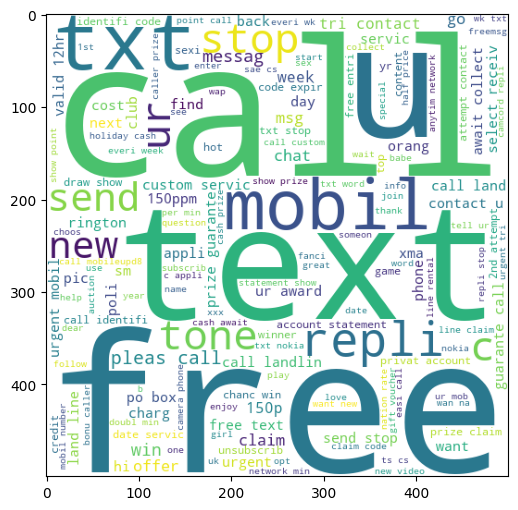

In [35]:

plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

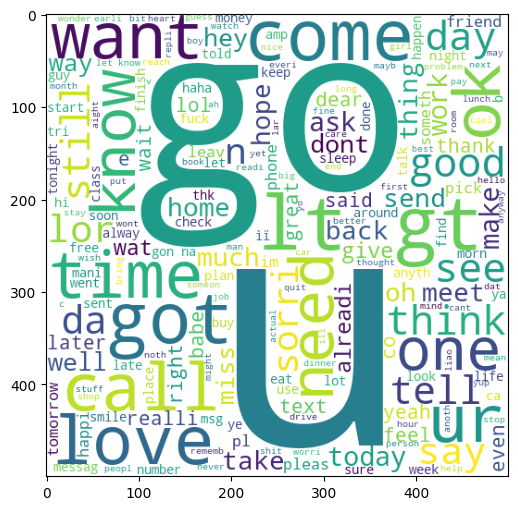

In [36]:

ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

Top 30 words from both ham and spam class.

In [37]:
df.head()

,target,text,num_characters,num_words,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [38]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        

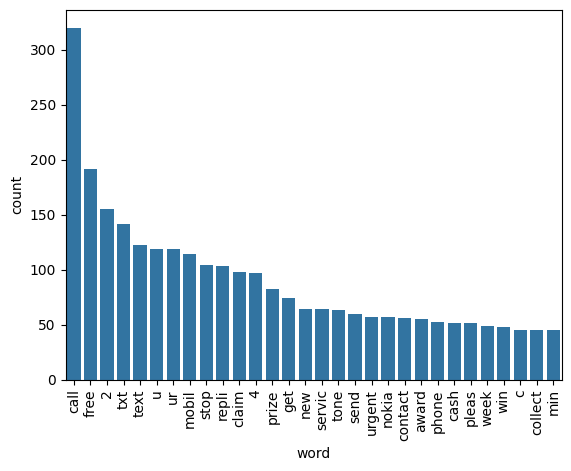

In [39]:
from collections import Counter
sample_df = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['word', 'count'])

# Use the DataFrame with sns.barplot
sns.barplot(x='word', y='count', data=sample_df)
plt.xticks(rotation='vertical')
plt.show()

In [40]:
df.columns

Index(['target', 'text', 'num_characters', 'num_words', 'num_sentence',
       'transformed_text'],
      dtype='object')

In [41]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

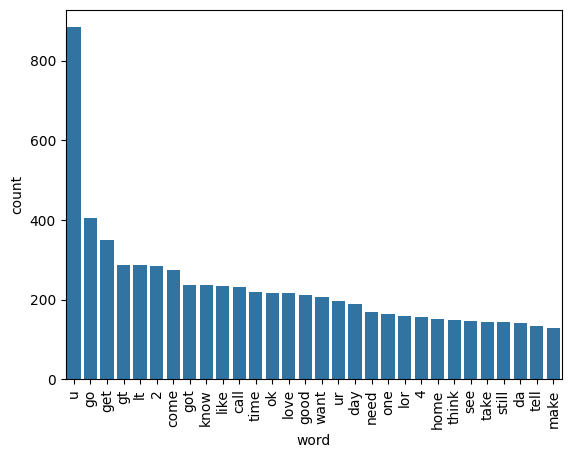

In [42]:
from collections import Counter
sample_df1 = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['word', 'count'])

# Use the DataFrame with sns.barplot
sns.barplot(x='word', y='count', data=sample_df1)
plt.xticks(rotation='vertical')
plt.show()

In [43]:
# Text Vectorization
# using Bag of Words
df.head()

,target,text,num_characters,num_words,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


# Model Building

In [44]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [45]:
X = cv.fit_transform(df['transformed_text']).toarray()

In [46]:
X.shape

(5169, 6708)

In [47]:
y = df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0], shape=(5169,))

In [48]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [49]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [50]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score


In [51]:
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [52]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [53]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


Making X now with tfidf, instead of bag of vectors

In [54]:

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)

X = tfidf.fit_transform(df['transformed_text']).toarray()
X.shape

(5169, 3000)

In [55]:
y = df['target'].values

In [56]:

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()


gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))


0.874274661508704
[[790 106]
 [ 24 114]]
0.5181818181818182


In [57]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [58]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [62]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb1 = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [63]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb1, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [64]:

def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [65]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [66]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9323017408123792
Precision -  0.8333333333333334
For  LR
Accuracy -  0.9555125725338491
Precision -  0.96
For  RF
Accuracy -  0.9738878143133463
Precision -  0.9826086956521739
For  AdaBoost
Accuracy -  0.9216634429400387
Precision -  0.8202247191011236
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8682170542635659
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  GBDT
Accuracy -  0.9506769825918762
Precision -  0.9306930693069307
For  xgb
Accuracy -  0.9680851063829787
Precision -  0.9487179487179487


In [67]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.973888,0.982609
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.955513,0.960000
10,xgb,0.968085,0.948718
9,GBDT,0.950677,0.930693
7,BgC,0.958414,0.868217
3,DT,0.932302,0.833333


In [68]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.970986
2,RF,Accuracy,0.973888
3,SVC,Accuracy,0.975822
4,ETC,Accuracy,0.974855
5,LR,Accuracy,0.955513
6,xgb,Accuracy,0.968085
7,GBDT,Accuracy,0.950677
8,BgC,Accuracy,0.958414
9,DT,Accuracy,0.932302


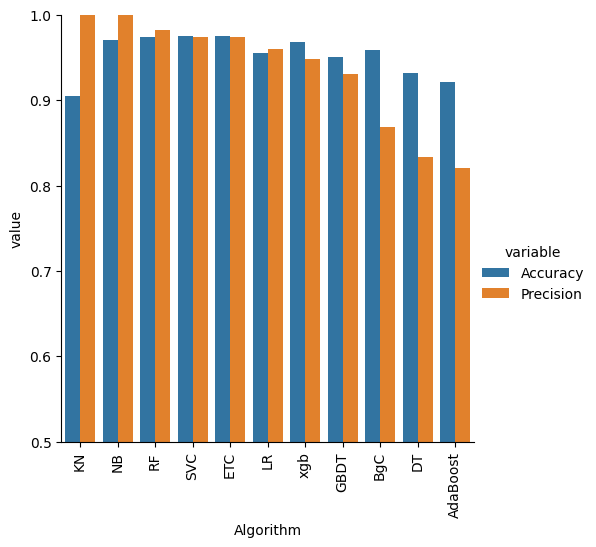

In [69]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [70]:
df.head()

,target,text,num_characters,num_words,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


Hi,how are you? did you get my parcel.

you've won a prize or a gift card, but requires you to click a link or provide personal information to claim it.

Congratulations! You've won a $1,000 gift card! Click on below link to claim.


In [60]:
user_input = input("Please Enter the message:")
transformed_sms = transform_text(user_input)
vector_input = tfidf.transform([transformed_sms])
result = mnb.predict(vector_input)[0]
if result == 1:
    print("Spam")
else:
    print("Not Spam")

Spam


In [71]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [72]:
import sklearn
print("numpy:",np.__version__)
print("pandas:",pd.__version__)
print("Scikit-learn:",sklearn.__version__)

numpy: 2.2.6
pandas: 2.2.3
Scikit-learn: 1.7.0


In [73]:
print("nltk:",nltk.__version__)

nltk: 3.9.1
